# PRIMERA ENTREGA PROYECTO FINAL ANDRADE-ALBERTINI


## COMENZAMOS CON UN BREVE ANALISIS DE NUESTRO DATASET

Importamos las librerias

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as sm

In [ ]:
url = "https://raw.githubusercontent.com/SebaCoder81/Coder_Proyecto_DataScience/main/credit_risk_dataset.csv"
df1= pd.read_csv('https://raw.githubusercontent.com/SebaCoder81/Coder_Proyecto_DataScience/main/credit_risk_dataset.csv',sep=',')
df1 #Levantamos y leemos el dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df1.head() #traemos las primeras 5 filas del dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df1.shape #Vemos la cantidad de filas y columnas

(32581, 12)

In [ ]:
df1.columns #Vemos el detalle de las columnas

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

Damos a comntinuación una breve explicación de cada una de las columnas:
1- Person_age: Edad de quien tomo el préstamo.
2- Person_income: Ingreso del deudor.
3- Person_home_ownership: Relación del sujeto con la vivienda que habita (dueño, inquilino, hipoteca).
4- Person_Emp_Length: Antiguedad laboral.
5- Loan_intent: Destino del préstamo solicitado.
6- Loan_Grade: Clasificación del préstamo.
7- Loan_amnt: monto del préstamo.
8- Loan_int_rate: Tasa de interes que devenga el préstamo.
9- Loan_status: Situación del crédito. Indica si el mismo se ha venido pagando en condiciones normales (0) o con atrasos (1).
10- Loan_percent_income: % del ingreso afectado a pagar la cuota del prèstamo.
11- cb_person_default_on_file: Existencia de antecedentes desfavorables en el sistema, previos a otorgar el crédito en cuestión.
12- cb_person_cred_hist_length: Extensión de su historial crediticio.

In [ ]:
df1.dtypes #Vemos los tipos de datos de cada columna del dataset

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
df1.index #Vemos los indices

RangeIndex(start=0, stop=32581, step=1)

In [ ]:
df1.info() #Vemos un resumen de la informacion contenida en el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df1.describe() #Vemos ahora un resumen de los datos estadisticos del dataset

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df1['loan_intent'].head() #Seleccionamos una columna especifica]

0     PERSONAL
1    EDUCATION
2      MEDICAL
3      MEDICAL
4      MEDICAL
Name: loan_intent, dtype: object

Grafico de barras, procentaje por destino del Prestamo

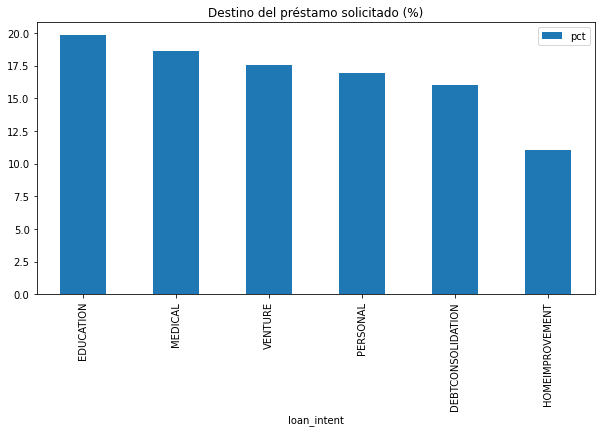

In [ ]:
df2 = df1.groupby('loan_intent').size().sort_values(ascending=False)
df2 = pd.DataFrame(df2)
df2.columns = ['count']
df2['pct'] = round((df2['count'] / df2['count'].sum()) * 100, 2)
df2['pct'].plot.bar(figsize=(10,5), legend=True, title="Destino del préstamo solicitado (%)");

Realizamos un nuevo grafico, en este caso discriminando a los solicitantes de creditos por edad.  Se puede observar que es una distribucion muy asimétrica a la derecha, con casi la totalidad de los casos acumulados en los valores mas bajos.

Text(0.5, 1.0, 'Histograma prestamos por edad del solicitante')

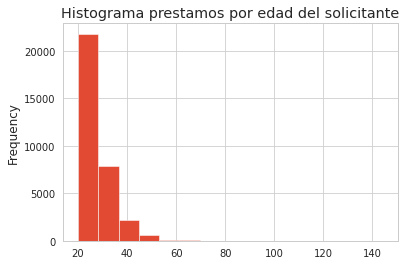

In [ ]:
df1['person_age'].plot.hist(bins=15).set_title('Histograma prestamos por edad del solicitante')

## COMENZAMOS CON EL ANALISIS

### ABSTRACT

El análisis del perfil de riesgo de crédito de un cliente es un tema relevante para las entidades financieras, toda vez que identifica los factores generadores de potenciales incumplimientos (edad, género, capacidad de pago), además de contribuir en la implementación de Sistemas de Administración de Riesgo Crediticio. 

El dataset con el cual estaremos trabajando cuenta con informaciòn acerca de la cartera de clientes con préstamos activos de determinada entidad financiera y, en la columna loan_status muestra aquellos que han tenido un desempeno bueno (0) y aquellas que han mostrado incumplimiento en el pago de sus obligaciones (1). El presente trabajo buscará analizar si existe correlación con alguna de las variables que pueda predecir la mencionada pd (probabilidad de default) de un cliente o bien si es posible determinar (combinando varias de las mencionadas variables) un perfil de cliente cuyo riesgo de incumplimiento se encuentra por encima de lo que la entidad esta dispuesta a tolerar. En caso de encontrar tal perfil, esta información se incorpora en los modelos de admisión de nuevos clientes  de la entidad, para mejorar los ratios de morosidad de la cartera, lo que permitirá -por un lado- exhibir en lo que respecta a su situación financiera, una mejora en lo que hace a la calidad de sus activos y -por otro lado-, afectar positivamente en términos económicos el P&L de la entidad, al ser menor el monto que deberá previsionarse por malos créditos.


### OBJETIVO

Encontrar perfil/es de cliente/s cuya probabilidad de default signifiquen un perjuicio para la calidad de la cartera y el P/L del banco, utilizando dicha información para optimizar los modelos de crédito existentes en la entidad.

### CONTEXTO COMERCIAL

Trabajamos para el equipo de riesgo de crédito en una entidad financiera que se dedica como actividad principal a la financiación de individuos.
Previo a la aprobación de cualquier crédito el mismo debe contar con el ok del modelo de score de la entidad.
Ante los importantes cambios que se han observado en la macroeconomía en los últimos tiempos, el modelo ha quedado desactualizado, con lo cual ha crecido el número de deudores cuyo cumplimiento no es satisfactorio. Es función del equipo de riesgo crediticio determinar qué mejoras deben realizarse para mejorar la calidad del proceso de aprobación de créditos.

### PROBLEMA COMERCIAL

Tal como se ha venido explicando en apartados anteriores, la pregunta a responder será:

¿Hay caracteristicas de los clientes en el dataset que impliquen en forma clara una muy superior probabilidad de incumplimiento en el pago de sus obligaciones? ¿Cuáles?


### CONTEXTO ANALÍTICO

Se nos han proporcionado datos sobre los más de 32.000 clientes que posee la entidad (edad, ingreso, tipo de préstamo, monto, entre otras). 

Los siguientes cuentan con el campo loan_status que oficiará de etiqueta. Esto es, hará las veces de variable que nos diga cuáles de estos clientes son satisfactoriamente cumplidores y cuales han mostrado un deficitario desempeño en el pago de sus préstamos. Es por ello que trabajaremos en un entorno de Aprendizaje Supervisado, siendo el presente un trabajo de clasificación (etiquetas buen pagador -loan_status=0-; mal pagador -loan_status=1-).


### EXPLORATORY DATA ANALYSIS (EDA)

Buscaremos -en primer lugar- analizar si existe una diferencia significativa en el ingreso medio de los pagadores buenos (loan_status=0) y los pagadores malos (loan_status=1)

[Text(0, 0, '0'), Text(0, 0, '1')]

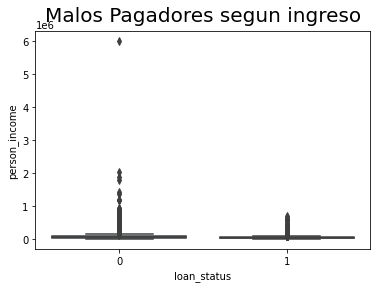

In [ ]:
ax=sns.boxplot(x = 'loan_status', y = 'person_income', data = df1) 
plt.title("Malos Pagadores segun ingreso", fontsize=20, verticalalignment='bottom');
ax.set_xticklabels(ax.get_xticklabels(),rotation=0) #Boxplot por tipo de pagador (bueno-0- o malo -1-)

Del cuadro precedente se puede observar la necesidad de tratar los outliers ya que los pocos casos ganando muy por encima del resto no permiten que se vean claramente los datos de importancia como ser la media, mediana, cuartiles, etc.

In [ ]:
df_alt = df1[df1['person_income'] <= 200000] #Dada la cantidad de outliers, para este primer acercamiento decidimos reducir el dataset a aquellos clientes con ingresos menores a 200000

[Text(0, 0, '0'), Text(0, 0, '1')]

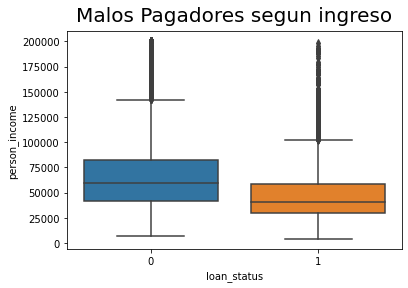

In [ ]:
ax=sns.boxplot(x = 'loan_status', y = 'person_income', data = df_alt) 
plt.title("Malos Pagadores segun ingreso", fontsize=20, verticalalignment='bottom');
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

Se observa, en linea con lo que sería esperable a priori, que es significativamente menor el ingreso medio, y la distribución de primer y tercer cuartil en aquellos clientes que no han podido/querido cumplir en forma regular con la obligación asumida. Se observa ademàs una fuerte concentración de casos que hacen que se encuentren muy proximos el 1er y 3er cuartil. 

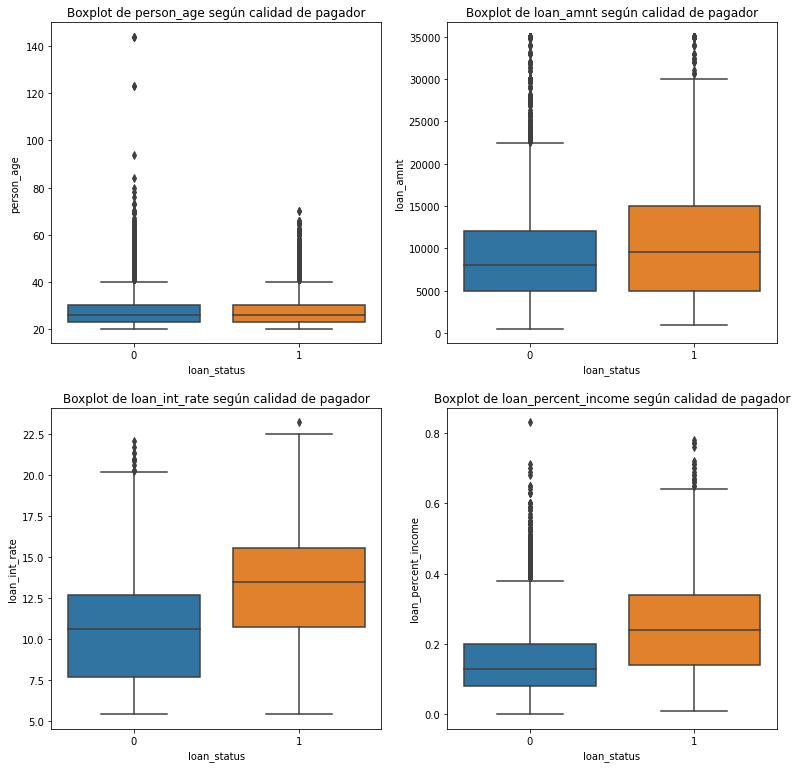

In [ ]:
plt.figure(figsize=(13,13)) 
vars_to_plot = ['person_age','loan_amnt','loan_int_rate','loan_percent_income']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1) 
    sns.boxplot(x = 'loan_status', y= var, data = df1)
    title_string = "Boxplot de " + var + " según calidad de pagador"
    plt.ylabel(var)
    plt.title(title_string) #Similar analisis al anterior, pero en lugar de ingreso se analiza la edad, monto del prestamo, tasa de interes y relacion cuota/ingreso

De los boxplots arriba expuestos parecería que hay mayor diferencia entre ambos grupos en lo que respecta a la tasa de interes (aquellos con mal comportamiento tienen en promedio una mayor tasa de interes, diferencia que se observa también en los 1er y 3er cuartil) y el porcentaje del ingreso que representa la cuota, que es también mayor en el grupo de cumplimiento deficiente.
En lo que respecta al monto del préstamo no pareciera haber diferencias significativas entre ambos grupos, al igual que en lo que a edades de los solicitantes respecta.

--------------------------------------------------------------------------------------------------------------------------

**CORRELACIONES**

Otra forma, más numérica pero no tan visual, de entender la relación que las otras variables tienen con la calidad de pagador es analizar los indices de correlación, tal como haremos a continuación:

In [ ]:
corr = df1.corr()
corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [ ]:
corr    = df1.corr()
pos_cor = corr['loan_status'] >0
neg_cor = corr['loan_status'] <0
corr['loan_status'][pos_cor].sort_values(ascending = False).round(2) #Vemos las variables con mayor correlacion directa con loan_status

loan_status            1.00
loan_percent_income    0.38
loan_int_rate          0.34
loan_amnt              0.11
Name: loan_status, dtype: float64

In [ ]:
corr['loan_status'][neg_cor].sort_values().round(2) #Vemos tambien las variables con mayor correlacion pero inversa con loan_status

person_income                -0.14
person_emp_length            -0.08
person_age                   -0.02
cb_person_cred_hist_length   -0.02
Name: loan_status, dtype: float64

Tal puede observarse en las dos últimas líneas son las variables que correlacionan más positivamente con loan_status el porcentaje del ingreso que representa el préstamo (loan_percent_income) y la tasa de interes (loan_int_rate), en tanto que no se observan variables que correlacionen fuertemente en forma negativa.

Por ultimo llevamos a una matriz las mencionadas correlaciones de la matriz.

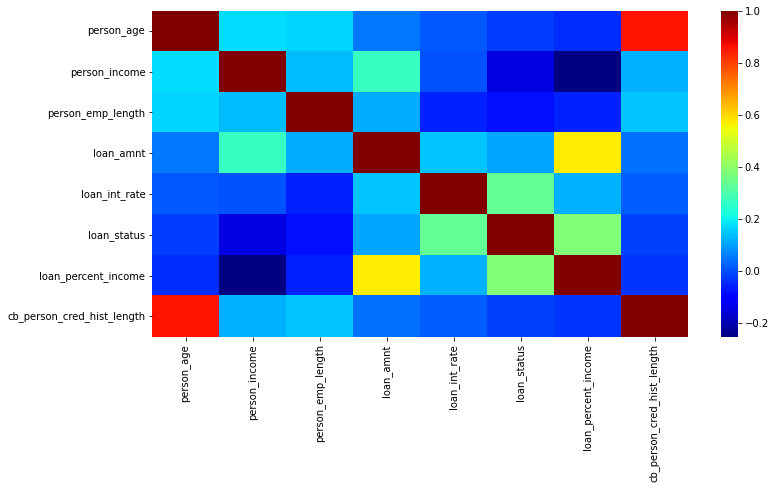

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),cmap='jet') #Matriz de correlacion de todas las variables del datase

Se desprende del gràfico realizado que no hay fuertes correlaciones entre casi nunguna de las variables (solo la edad y el historial de crèdito lo hacen en forma significativa, siendo las variables con mayor correlaciòn directa con loan_status la tasa de interes y el % del ingreso que el crèdito significa. Ninguna de las variables es significativa en tèrminos de correlaciòn inversa.

**2**

**Analisis para el Departamento de Marketing** Para poder determinar a donde dirigir la campaña publiciaria y donde deben buscarse nuevos clientes.

Analisis de solicitudes de prestamos En este caso vamos a analizar desde el area de marketing que rango etario y que otras caracteristicas prdominarían entre los clientes del dataset

In [ ]:
df2= pd.read_csv('https://raw.githubusercontent.com/SebaCoder81/Coder_Proyecto_DataScience/main/credit_risk_dataset.csv',sep=',')
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Vamos a analizar el rango etario de los solicitantes de los prestamos. Pregunta: En que rango etario se encuentra la mayor cantidad de prestamos solicitados?

Acotamos el rango a menores de 60 años

In [ ]:
rango_etario_60 = df2[df2['person_age'] <= 60]
rango_etario=rango_etario_60.groupby('person_age').size()
rango_etario

person_age
20      15
21    1229
22    3633
23    3889
24    3549
25    3037
26    2477
27    2138
28    1854
29    1687
30    1316
31    1142
32     964
33     856
34     709
35     620
36     548
37     478
38     373
39     302
40     271
41     241
42     188
43     164
44     141
45     108
46      94
47      94
48      75
49      49
50      52
51      39
52      36
53      30
54      24
55      20
56      15
57      15
58      19
59       5
60      15
dtype: int64

Text(0, 0.5, 'PRESTAMOS')

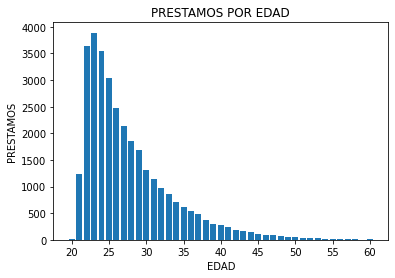

In [ ]:
plt.bar(rango_etario.index,rango_etario.values)
plt.title('PRESTAMOS POR EDAD')
plt.xlabel('EDAD')
plt.ylabel('PRESTAMOS')

Text(0, 0.5, 'PRESTAMOS')

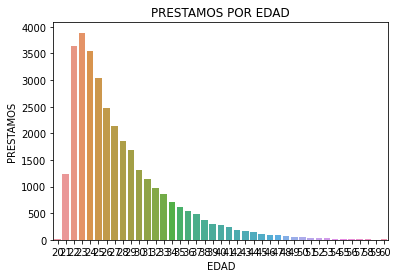

In [ ]:
sns.barplot(x=rango_etario.index, y=rango_etario.values)
plt.title('PRESTAMOS POR EDAD')
plt.xlabel('EDAD')
plt.ylabel('PRESTAMOS')

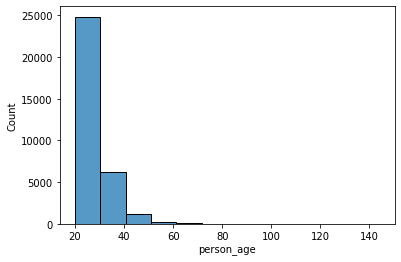

In [ ]:
sns.histplot(data=df2, x="person_age", bins=12)
plt.show()

Del histograma precedente se observa una fortisima concentración de clientes entre 20-30 años, lo que permite sacar diversas conclusiones, entre las que podemos mencionar:

a- si se quiere analizar promociones destinadas a fidelizar clientes existentes serán más exitosas aquellas vinculadas con esa etapa (ej: créditos para primera vivienda, primer automovil, financiación de estudios, etc).

b- Por otra parte, si lo que se busca es equilibrar el gràfico incorporando a clientes de rangos etareos superiores deberá enfocarse la entidad en otorgar créditos para otros targets (ampliación de vivienda en el caso de 30- 40, 40-50, estudios mèdicos en el caso de los +50, solo por mencionar dos ejemplos).

Con los graficos realizados podemos ver que la edad con mayor solicitud de prestamos es 22, 23 y 24 años.

A continuacion vamos a analizar como se comportan los clientes segun el motivo de los prestamos solicitados

In [ ]:
motivo=df2.groupby('loan_intent').size()
motivo

loan_intent
DEBTCONSOLIDATION    5212
EDUCATION            6453
HOMEIMPROVEMENT      3605
MEDICAL              6071
PERSONAL             5521
VENTURE              5719
dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

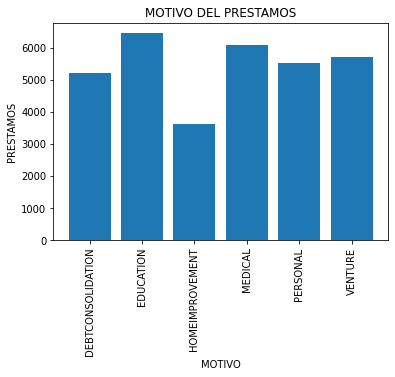

In [ ]:
plt.bar(motivo.index,motivo.values)
plt.title('MOTIVO DEL PRESTAMOS')
plt.xlabel('MOTIVO')
plt.ylabel('PRESTAMOS')
plt.xticks(rotation=90) #Cantidad de prestamos por destino

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

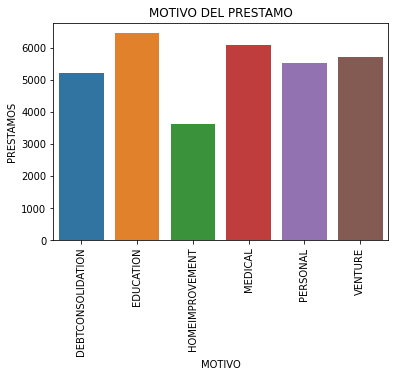

In [ ]:
sns.barplot(x=motivo.index, y=motivo.values)
plt.title('MOTIVO DEL PRESTAMO')
plt.xlabel('MOTIVO')
plt.ylabel('PRESTAMOS')
plt.xticks(rotation=90)

Como vemos en los graficos recientemente expuestos podemos indicar que las destinos con mayor cantidad de solicitudes de prestamos son Educacion y Medicos

Ahora vamos a analizar la situacion de vivienda de cada solicitante

In [ ]:
vivienda=df2.groupby('person_home_ownership').size()
vivienda

person_home_ownership
MORTGAGE    13444
OTHER         107
OWN          2584
RENT        16446
dtype: int64

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

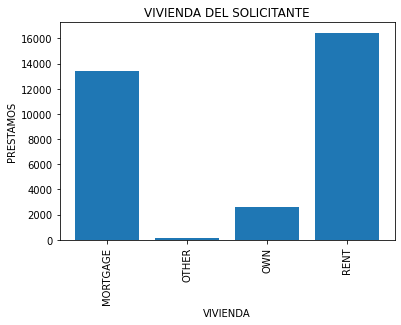

In [ ]:
plt.bar(vivienda.index,vivienda.values)
plt.title('VIVIENDA DEL SOLICITANTE')
plt.xlabel('VIVIENDA')
plt.ylabel('PRESTAMOS')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

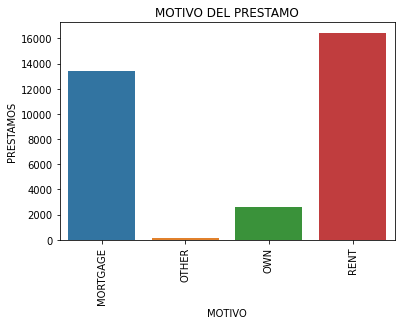

In [ ]:
sns.barplot(x=vivienda.index, y=vivienda.values)
plt.title('MOTIVO DEL PRESTAMO')
plt.xlabel('MOTIVO')
plt.ylabel('PRESTAMOS')
plt.xticks(rotation=90)

Con los graficos podemos identificar que la mayoria de los solicitantes alquilan o estan pagando hipotecas.

En conclusion podemos determinar que el rango etario al que hay que apuntar es de 22 a 24 años, los motivos principales son para Educacion y Medicina. Y a nivel vivienda este grupo es inquilino o esta pagando una hipoteca.

# SEGUNDA ENTREGA PROYECTO FINAL ANDRADE-ALBERTINI

## DATA WRANGLING

### Fase 1: Descubrimiento

Validamos a continuaciòn la existencia o no de datos nulos

In [ ]:
df1.isnull().sum() #consulta de nulos

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Se observa inmediatamente arriba que las celdas que poseen datos nulos son las de antiguedad laboral (person_emp_length, con 895 nulos, representativos del 2.75% del total) y tasa de interes (loan_int_rate, con 3116 nulos, representativos del 9.57% del total). Ambos son datos flotantes (ver celda siguiente).

A continuación vamos a chequear que la variable que buscamos pronosticar (loan_status) tenga solo variables 0 y 1

In [ ]:
df1.loan_status.value_counts() #ver valores unicos de la variable loan_status

0    25473
1     7108
Name: loan_status, dtype: int64

Observamos que efectivamente hay solo 0 y 1, pero que se trata de un dataset desbalanceado, con muchos mas 0 que 1.

### Fase 2: Estructuración

A continuación se procede a asignar a los valores nulos de la columna tasa de interes la mediana de cada valor de la variable loan_intent	

In [ ]:
debtconsolidation_median = df2[df2['loan_intent'] == 'DEBTCONSOLIDATION']['loan_int_rate'].median()
education_median = df2[df2['loan_intent'] == 'EDUCATION']['loan_int_rate'].median()
homeimprovement_median = df2[df2['loan_intent'] == 'HOMEIMPROVEMENT']['loan_int_rate'].median()
medical_median = df2[df2['loan_intent'] == 'MEDICAL']['loan_int_rate'].median()
personal_median = df2[df2['loan_intent'] == 'PERSONAL']['loan_int_rate'].median()
venture_median = df2[df2['loan_intent'] == 'VENTURE']['loan_int_rate'].median()

In [ ]:
df2.loc[(df2[(df2['loan_intent'] == 'DEBTCONSOLIDATION') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'DEBTCONSOLIDATION']['loan_int_rate'].fillna(debtconsolidation_median)
df2.loc[(df2[(df2['loan_intent'] == 'EDUCATION') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'EDUCATION']['loan_int_rate'].fillna(education_median)
df2.loc[(df2[(df2['loan_intent'] == 'HOMEIMPROVEMENT') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'HOMEIMPROVEMENT']['loan_int_rate'].fillna(homeimprovement_median)
df2.loc[(df2[(df2['loan_intent'] == 'MEDICAL') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'MEDICAL']['loan_int_rate'].fillna(medical_median)
df2.loc[(df2[(df2['loan_intent'] == 'PERSONAL') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'PERSONAL']['loan_int_rate'].fillna(personal_median)
df2.loc[(df2[(df2['loan_intent'] == 'VENTURE') & df2['loan_int_rate'].isnull()].index),'loan_int_rate'] = df2[df2['loan_intent'] == 'VENTURE']['loan_int_rate'].fillna(venture_median)

Para la otra variable con datos nulos (person_emp_length) utilizamos la mediana de los valores no nulos para imputar.

In [ ]:
df2['person_emp_length'] = df2['person_emp_length'].fillna(df2['person_emp_length'].median())

In [ ]:
df2.isnull().sum() #Chequeamos que efectivamente no hayan quedado valores nulos tras las imputaciones efectuadas

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


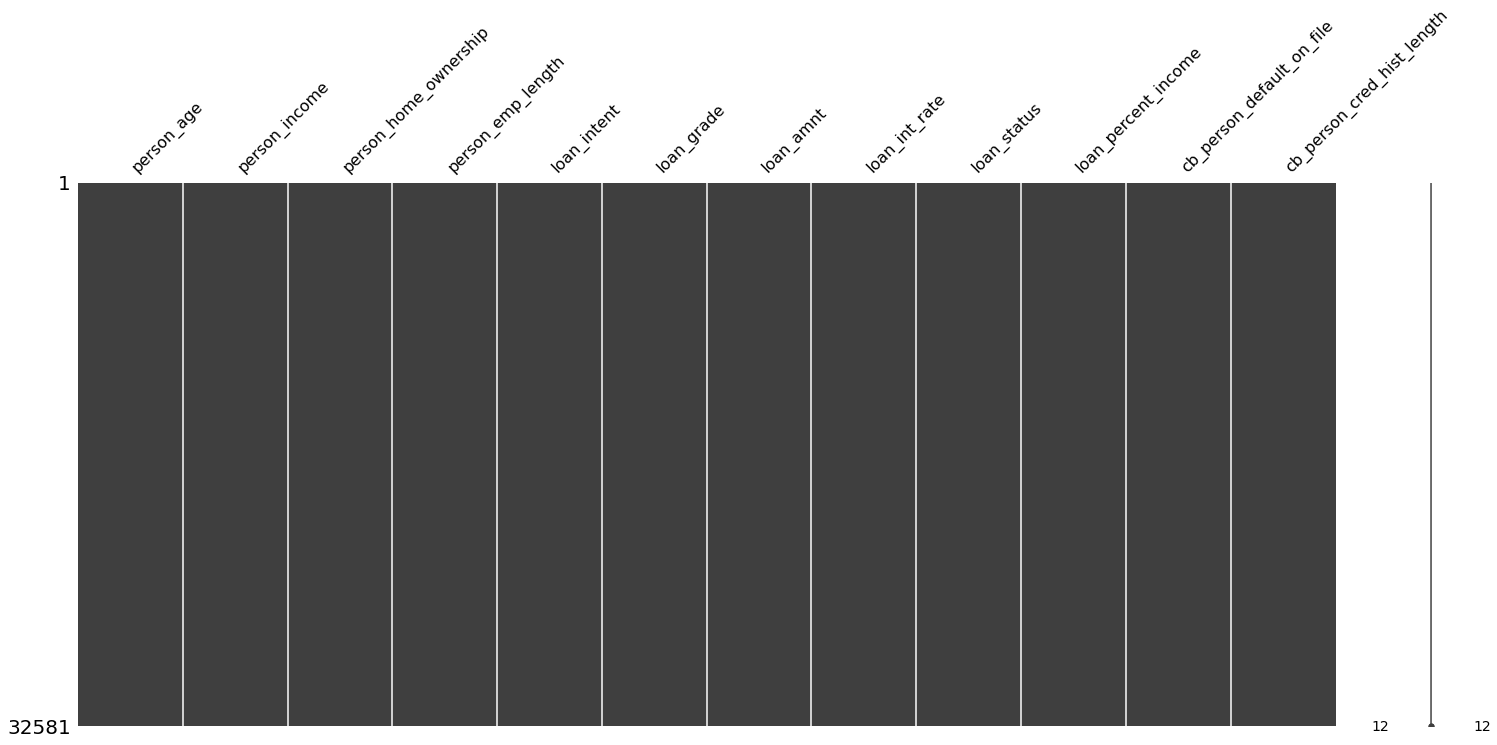

In [ ]:
import missingno as msno
msno.matrix(df2) #Vemos graficamente la inexistencia de nulos

### Fase 3: Limpieza


In [ ]:
df2[df2.dtypes[df2.dtypes== float].index] # filtrar columnas flotantes

,person_emp_length,loan_int_rate,loan_percent_income
0,123.0,16.02,0.59
1,5.0,11.14,0.10
2,1.0,12.87,0.57
3,4.0,15.23,0.53
4,8.0,14.27,0.55
...,...,...,...
32576,1.0,13.16,0.11
32577,4.0,7.49,0.15
32578,3.0,10.99,0.46
32579,5.0,11.48,0.10


In [ ]:
df2[df2.dtypes[df2.dtypes== float].index].quantile(0.75)-df2[df2.dtypes[df2.dtypes== float].index].quantile(0.25) #Calculo IQR de las variables flotantes

person_emp_length      5.00
loan_int_rate          4.62
loan_percent_income    0.14
dtype: float64

#### Tratamiento de outliers para las variables person_emp_length y loan_percent_income

In [ ]:
import numpy as np
def imputar_outliers_IQR(df2):
   q1=df2.quantile(0.25)
   q3=df2.quantile(0.75)
   IQR=q3-q1
   upper = df2[~(df2>(q3+1.5*IQR))].max()
   lower = df2[~(df2<(q1-1.5*IQR))].min()
   df = np.where(df2 > upper, 
                 df2.median(),
                 np.where(df2 < lower,
                          df2.median(),
                          df2) 
                 )
   return df2 #Se imputa la mediana a valores por encima de o por debajo de Q3 o Q1 +/- 1.5 IQR

In [ ]:
df2[['person_emp_length','loan_percent_income']]=imputar_outliers_IQR(df2[['person_emp_length','loan_percent_income']])
df2.head() #Se aplica la funcion creada para corregir los outliers de las variables seleccionadas

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


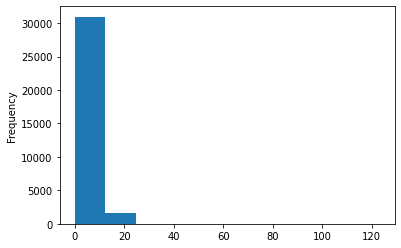

In [ ]:
df2['person_emp_length'].plot(kind='hist') #verificamos la inexistencia de outliers tras el proceso realizado

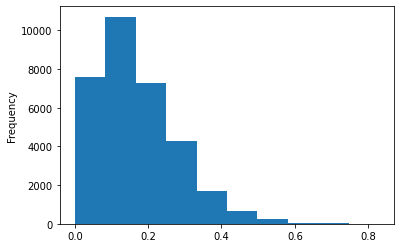

In [ ]:
df2['loan_percent_income'].plot(kind='hist') #verificamos la inexistencia de outliers tras el proceso realizado

### Fase 4: Enriquecimiento


In [ ]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df2['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq()
keywords = ['RENT', 'OWN', 'MORTGAGE']
pytrends.build_payload(keywords, cat=0, geo='AR', gprop='') # Datos de los ultimos 5 años
stop_queries = pytrends.interest_over_time()[keywords]
stop_queries.head()

,RENT,OWN,MORTGAGE
date,,,
2018-01-21,65,35,0
2018-01-28,65,36,0
2018-02-04,64,41,2
2018-02-11,57,22,0
2018-02-18,46,36,0


In [ ]:
df_t=stop_queries.groupby(by=stop_queries.index.year).mean().T
df_t.index=df_t.index.rename('person_home_ownership')
df_t

date,2018,2019,2020,2021,2022,2023
person_home_ownership,,,,,,
RENT,50.98,62.692308,47.538462,56.423077,57.192308,67.0
OWN,31.14,32.346154,34.500000,30.442308,35.846154,32.0
MORTGAGE,3.78,8.557692,11.923077,9.846154,6.115385,6.5


In [ ]:
df_final=pd.merge(left=df2, right=df_t, on='person_home_ownership',how='left')
df_final.head(150)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,2018,2019,2020,2021,2022,2023
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,50.98,62.692308,47.538462,56.423077,57.192308,67.0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,31.14,32.346154,34.500000,30.442308,35.846154,32.0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,3.78,8.557692,11.923077,9.846154,6.115385,6.5
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,50.98,62.692308,47.538462,56.423077,57.192308,67.0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,50.98,62.692308,47.538462,56.423077,57.192308,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26,47000,RENT,0.0,HOMEIMPROVEMENT,D,25000,15.28,1,0.53,Y,2,50.98,62.692308,47.538462,56.423077,57.192308,67.0
146,23,47000,RENT,1.0,VENTURE,E,25000,17.93,1,0.53,N,2,50.98,62.692308,47.538462,56.423077,57.192308,67.0
147,23,13200,MORTGAGE,2.0,EDUCATION,B,1400,9.25,0,0.11,N,4,3.78,8.557692,11.923077,9.846154,6.115385,6.5
148,21,13200,OWN,0.0,VENTURE,C,4500,12.98,1,0.34,N,4,31.14,32.346154,34.500000,30.442308,35.846154,32.0


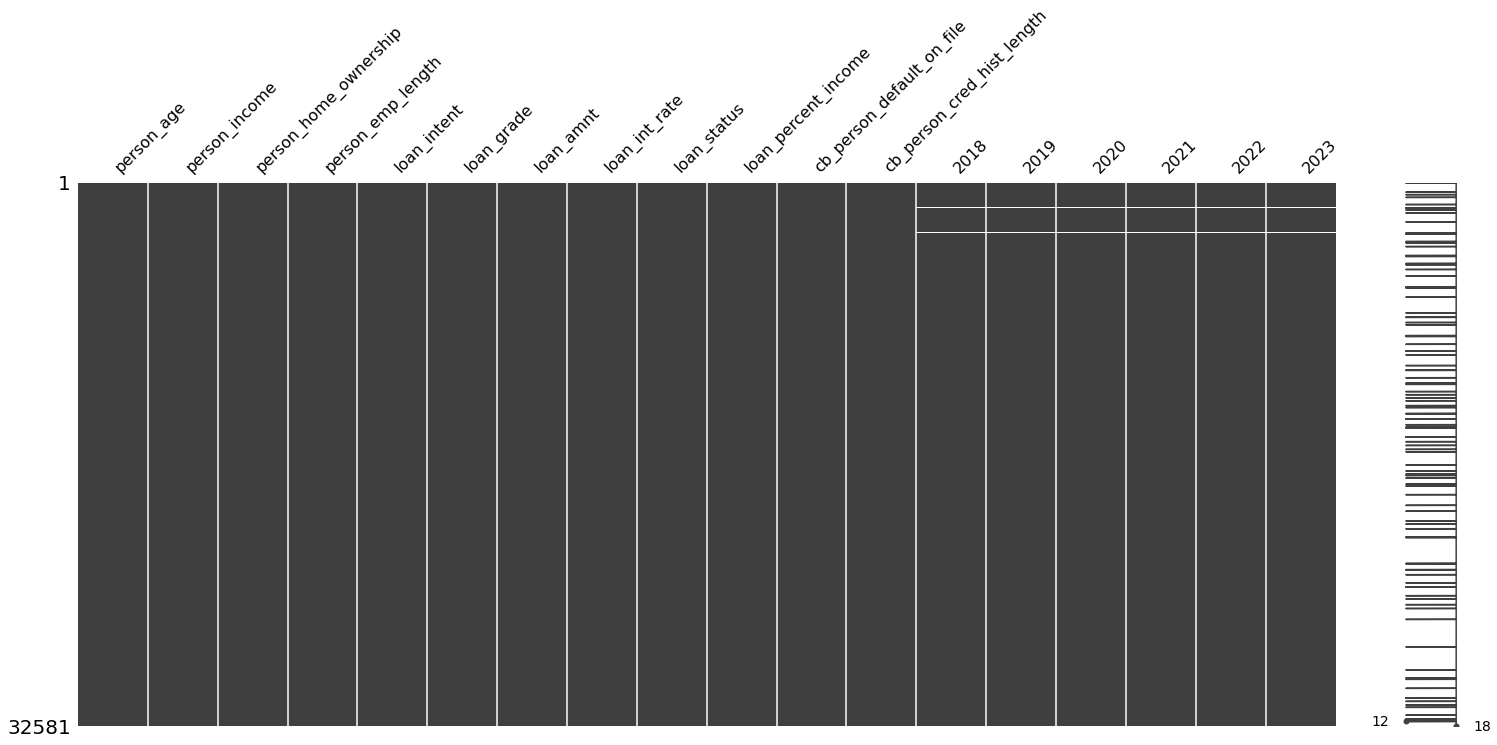

In [ ]:
import missingno as msno
msno.matrix(df_final)

In [ ]:
df_final[2018] = df_final[2018].fillna(0)
df_final[2019] = df_final[2019].fillna(0)
df_final[2020] = df_final[2020].fillna(0)
df_final[2021] = df_final[2021].fillna(0)
df_final[2022] = df_final[2022].fillna(0)
df_final[2023] = df_final[2023].fillna(0)

Aclaracion: Dado que no se encontró utilidad para el análisis que nos encontramos desarrollando, la etapa de enriquecimiento con fuentes externas solo se realizó a fines de llevar a la práctica lo aprendido. Para el desarrollo de los modelos (TERCER ENTREGA) avanzaremos ignorando el presente acápite.

## Storytelling

La finalidad del presente trabajo es encontrar perfil/es de cliente/s cuya probabilidad de default signifiquen un perjuicio para la calidad de la cartera y el P/L del banco, utilizando dicha información para optimizar los modelos de crédito existentes en la entidad. En resumidas cuentas, determinar si es alguna de las características incluidas en el dataset o alguna combinación de ellas buena para segmentar clientes con adecuado cumplimiento crediticio de aquellos que no lo son?

Si bien a priori uno podría intuir que el ingreso del solicitante es la variable que mejor segmenta el comportamiento se puede observar del siguiente cuadro que ello no es así, aunque sí existe (como se ve en el segundo gràfico) importante incidencia de malos pagadores por debajo de cierto umbral mínimo de ingresos (en torno a los $19k), lo cual es lógico ya que cualquier persona priorizaría -con un bajo nivel de ingreso- cubrir primeramente otras necesidades, tales como la comida y necesidades bàsicas.

En base a lo expuesto, sería recomendable incluir dentro de las políticas de otorgamiento de créditos de la entidad un ingreso mínimo para acceder a asistencia financiera.

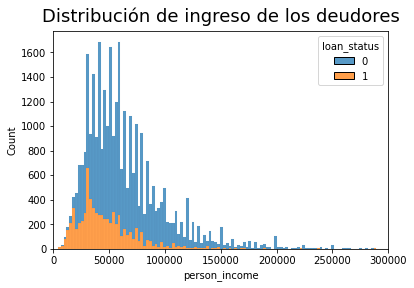

In [ ]:
ax=sns.histplot(data=df_final, x="person_income", hue="loan_status", multiple="stack")
ax.set_xlim(0, 300000)
plt.title("Distribución de ingreso de los deudores", fontsize=18, verticalalignment='bottom');
plt.show()

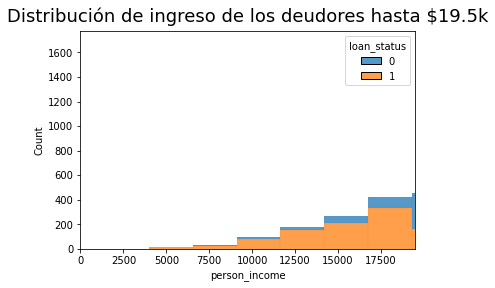

In [ ]:
ax=sns.histplot(data=df_final, x="person_income", hue="loan_status", multiple="stack")
ax.set_xlim(0, 19500)
plt.title("Distribución de ingreso de los deudores hasta $19.5k", fontsize=18, verticalalignment='bottom');
plt.show()

Realizamos como segundo paso un histograma de frecuencia del que claramente se puede ver la **mayor incidencia de los creditos con incumplimiento (loan_status=1) en aquellos casos cuyo pago absorben màs de aproximadamente el 30% de los ingresos.** 

**Para evitar esa mora incremental será importante que el banco tenga una estricta polìtica en materia de relación cuota/ ingreso al momento de otorgamiento de facilidades de crèdito.**

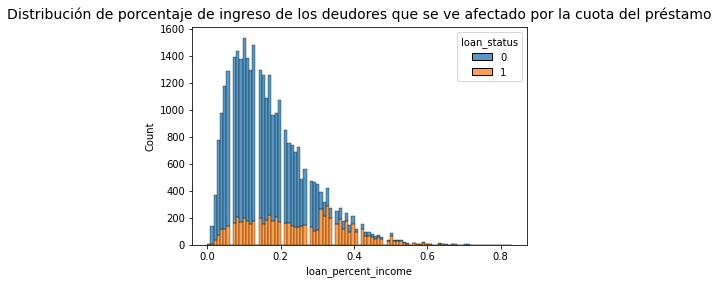

In [ ]:
sns.histplot(data=df_final, x="loan_percent_income", hue="loan_status", multiple="stack")
plt.title("Distribución de porcentaje de ingreso de los deudores que se ve afectado por la cuota del préstamo", fontsize=14, verticalalignment='bottom');

Como tercer paso realizamos similar análisis pero reemplazando el porcentaje del ingreso por el monto del crédito solicitado. En este caso, **no parece observarse un rango de valores que concentre mayor cantidad de préstamos con mal cumplimiento.**

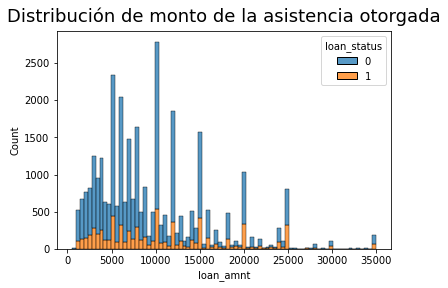

In [ ]:
sns.histplot(data=df_final, x="loan_amnt", hue="loan_status", multiple="stack")
plt.title("Distribución de monto de la asistencia otorgada", fontsize=18, verticalalignment='bottom');

En lo que respecta a la tasa de interes se observa que, cuanto mayor es la tasa, es mayor la posibilidad de incumplimiento, mostrandose entre 14% y 17% practicamente la mitad de los mismos con loan_status=1, situación que se amplia a casi la totalidad del universo de prèstamos cuya tasa de interés sea mayor al 17%.

Dado que la tasa de interés no depende exclusivamente de la política de la compañía, no es fácil tomar medidas en base a este parámetro (por caso, la tasa de interés de referencia o el tratarse o no de una refinanciación puede implicar niveles más altos de tasa).

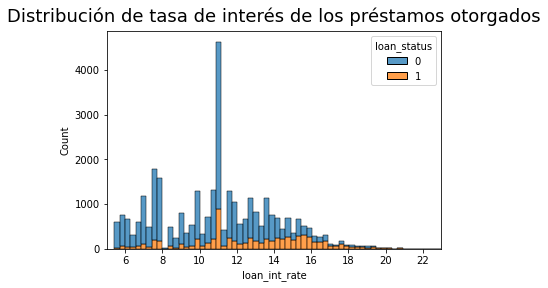

In [ ]:
ax=sns.histplot(data=df_final, x="loan_int_rate", hue="loan_status", multiple="stack")
ax.set_xlim(5, 23)
plt.title("Distribución de tasa de interés de los préstamos otorgados", fontsize=18, verticalalignment='bottom');
plt.show()

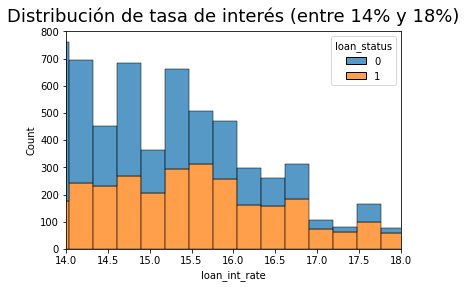

In [ ]:
ax=sns.histplot(data=df_final, x="loan_int_rate", hue="loan_status", multiple="stack")
ax.set_xlim(14, 18)
ax.set_ylim(0, 800)
plt.title("Distribución de tasa de interés (entre 14% y 18%)", fontsize=18, verticalalignment='bottom');
plt.show()

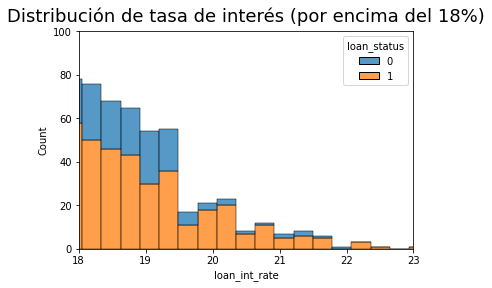

In [ ]:
ax=sns.histplot(data=df_final, x="loan_int_rate", hue="loan_status", multiple="stack")
ax.set_xlim(18, 23)
ax.set_ylim(0, 100)
plt.title("Distribución de tasa de interés (por encima del 18%)", fontsize=18, verticalalignment='bottom');
plt.show()

**Para culminar el análisis de las variables numéricas hemos realizado el mismo gráfico para la antiguedad laboral, la historia crediticia y la edad; mostrando los resultados (a continuación expuestos) que tampoco nos encontramos ante variables individualmente buenas para segmentar clientes con mal character.**

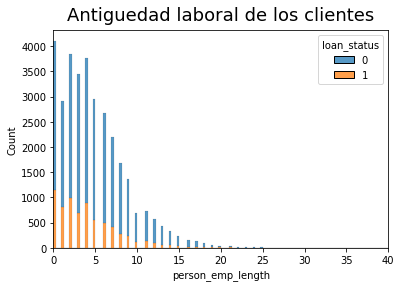

In [ ]:
ax=sns.histplot(data=df_final, x="person_emp_length", hue="loan_status", multiple="stack")
ax.set_xlim(0, 40)
plt.title("Antiguedad laboral de los clientes", fontsize=18, verticalalignment='bottom');
plt.show()

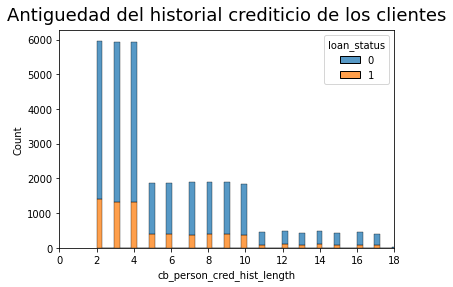

In [ ]:
ax=sns.histplot(data=df_final, x="cb_person_cred_hist_length", hue="loan_status", multiple="stack")
ax.set_xlim(0, 18)
plt.title("Antiguedad del historial crediticio de los clientes", fontsize=18, verticalalignment='bottom');
plt.show()

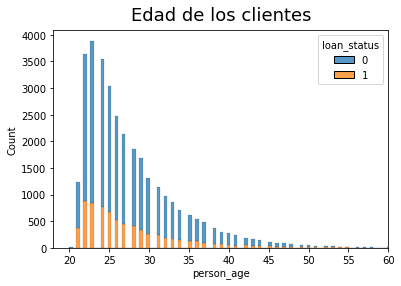

In [ ]:
ax=sns.histplot(data=df_final, x="person_age", hue="loan_status", multiple="stack")
ax.set_xlim(18, 60)
plt.title("Edad de los clientes", fontsize=18, verticalalignment='bottom');
plt.show()

Procedemos a continuación a analizar si alguna de las variables cuantitativas permite discriminar medianamente bien a los buenos y malos pagadores. **En primer lugar observamos que el peor segmento de pagadores es el de inquilinos, el cual es a la vez el subsegmento de mayor participación en la cartera total de la entidad. Ello nos podría llevar a pensar la posibilidad de ser más restrictivos en el otorgamiento de créditos a estos últimos, buscando mediante alguna campaña incrementar la participación de dueños o titulares de hipotecas**.

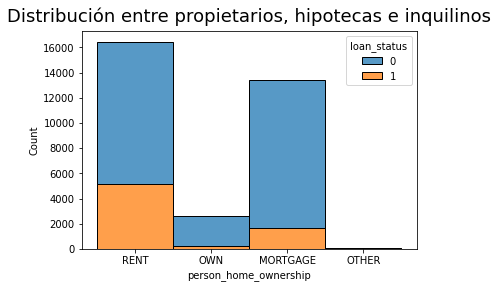

In [ ]:
ax=sns.histplot(data=df_final, x="person_home_ownership", hue="loan_status", multiple="stack")
plt.title("Distribución entre propietarios, hipotecas e inquilinos", fontsize=18, verticalalignment='bottom');

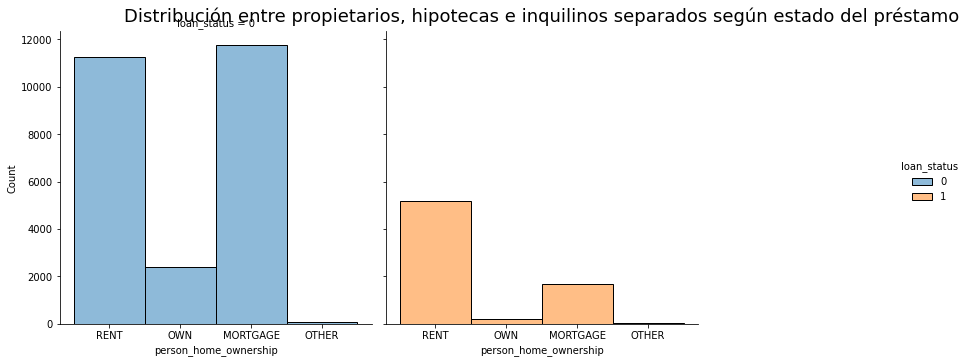

In [ ]:
sns.displot(data=df_final, x="person_home_ownership", hue="loan_status", col="loan_status")
plt.title("Distribución entre propietarios, hipotecas e inquilinos separados según estado del préstamo", fontsize=18, verticalalignment='bottom');

Respecto al destino de los préstamos, no resulta clara la supremacía de ninguno de los subgrupos.

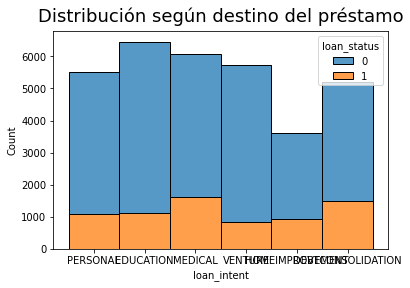

In [ ]:
ax=sns.histplot(data=df_final, x="loan_intent", hue="loan_status", multiple="stack")
plt.title("Distribución según destino del préstamo", fontsize=18, verticalalignment='bottom');

Por último, respecto a la existencia de antecedentes desfavorables previos, en linea con lo que se podría pensar en forma intuitiva, es sustancialmente superior el % de incumplidores entre aquellos clientes que ya poseen antecedentes desfavorables previos en bases de consulta.

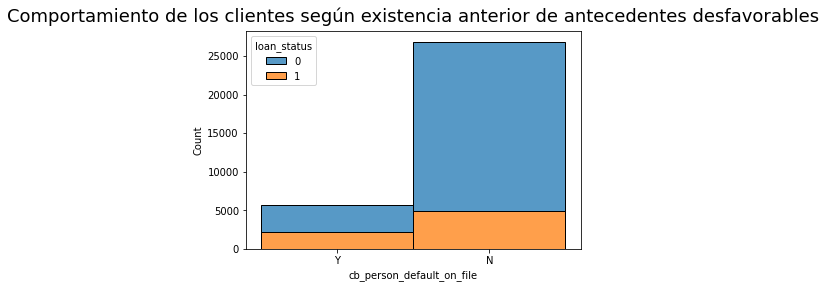

In [ ]:
ax=sns.histplot(data=df_final, x="cb_person_default_on_file", hue="loan_status", multiple="stack")
plt.title("Comportamiento de los clientes según existencia anterior de antecedentes desfavorables", fontsize=18, verticalalignment='bottom');

En resumen, como primer vistazo podemos mencionar que existen algunas variables que podríamos utilizar para establecer políticas de admisión para clientes de crédito, tal el caso de un nivel mínimo de ingresos, una relación cuota/ ingreso que no supere el 30%, tratar de minimizar/ reducir en la medida que sea posible la exposición con inquilinos y evitar clientes con antecedentes ya verificados.

# TERCERA ENTREGA PROYECTO FINAL ANDRADE-ALBERTINI

### Trabajos previos sobre el dataset

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, classification_report

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X=df2[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]
y= df2['loan_status'] #armamos el dataset x con todas las variables menos la target y la Y en la que solo incluimos la excluida en el anterior

In [ ]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [ ]:
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [ ]:
A=X[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']] # Dataset A acumula todas las variables numericas

In [ ]:
B=pd.get_dummies(X[['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']]) ## Dataset B acumula todas las variables categóricas. Armamos las dummies para trabajar estas variables
...

In [ ]:
C= A.columns
C

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
A[C] = ms.fit_transform(A)
A.head() #Normalizamos las variables en A

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0.016129,0.009173,1.000000,1.000000,0.595506,0.710843,0.035714
1,0.008065,0.000934,0.040650,0.014493,0.321348,0.120482,0.000000
2,0.040323,0.000934,0.008130,0.144928,0.418539,0.686747,0.035714
3,0.024194,0.010257,0.032520,1.000000,0.551124,0.638554,0.000000
4,0.032258,0.008406,0.065041,1.000000,0.497191,0.662651,0.071429


In [ ]:
X_new=pd.concat([A,B],axis=1)
X_new=X_new.drop(columns='cb_person_default_on_file_Y')
X_new.head() #Unimos todas las columnas ya procesadas incluidas en A y B en un nuevo dataset.

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N
0,0.016129,0.009173,1.000000,1.000000,0.595506,0.710843,0.035714,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.008065,0.000934,0.040650,0.014493,0.321348,0.120482,0.000000,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0.040323,0.000934,0.008130,0.144928,0.418539,0.686747,0.035714,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.024194,0.010257,0.032520,1.000000,0.551124,0.638554,0.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.032258,0.008406,0.065041,1.000000,0.497191,0.662651,0.071429,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42) #Separamos el dataset nuevo en Train (70%) y Test (30%)

### PRIMER MÉTODO: Random Forest- Accuracy 91%, Accuracy tras ajustar hiperparámetros 93%

#### Aplicación del método

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=100,criterion="gini")  
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

Accuracy: 0.910076726342711
ROC AUC Score: 0.9035067456671624


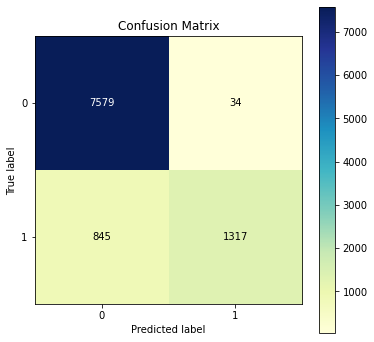

In [83]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf)) #Armamos la matriz de confusion

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred_rf, y_true= y_test)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7613
           1       0.97      0.61      0.75      2162

    accuracy                           0.91      9775
   macro avg       0.94      0.80      0.85      9775
weighted avg       0.92      0.91      0.90      9775



Text(0.5, 0, 'Random Forest Feature Importance')

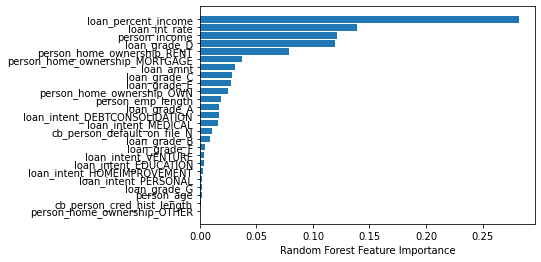

In [85]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance") #Analizamos las variables mas explicativas del modelo

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7579   34]
 [ 845 1317]]

True Positives(TP) =  7579

True Negatives(TN) =  1317

False Positives(FP) =  34

False Negatives(FN) =  845


#### Correción hiperparámetros

In [87]:
#Acto seguido veremos el hypertuning
params = {
    'n_estimators' : [30,50,100,200],
    'max_depth':[4,5,10,20]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  # 
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [88]:
#Entrenamos el modelo 
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 10, 20],
                         'n_estimators': [30, 50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

In [89]:
grid_random_forest.best_params_ #Obtenemos los mejores parametros para ajustar el modelo

{'max_depth': 20, 'n_estimators': 200}

#### Aplicación del método con hiperparámetros corregidos

In [90]:
rf2 = RandomForestClassifier(max_depth=20, random_state=42, n_estimators=100,criterion="gini")  #Ajustamos los hiperparametros segun lo definido en el punto anterior y realizamos el mismo trabajo que el realizado previamente para verificar los cambios
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_rf2 = rf2.predict_proba(X_test)[:, 1]


Accuracy: 0.9325831202046035
ROC AUC Score: 0.9352706912429966


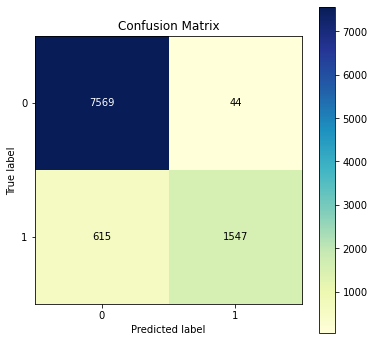

In [91]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf2, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf2))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf2))

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred_rf2, y_true= y_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7613
           1       0.97      0.72      0.82      2162

    accuracy                           0.93      9775
   macro avg       0.95      0.85      0.89      9775
weighted avg       0.94      0.93      0.93      9775



In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf2)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7569   44]
 [ 615 1547]]

True Positives(TP) =  7569

True Negatives(TN) =  1547

False Positives(FP) =  44

False Negatives(FN) =  615


### SEGUNDO MÉTODO: KNN- Accuracy 89%

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

Accuracy: 0.8927877237851662
ROC AUC Score: 0.8792708817735085


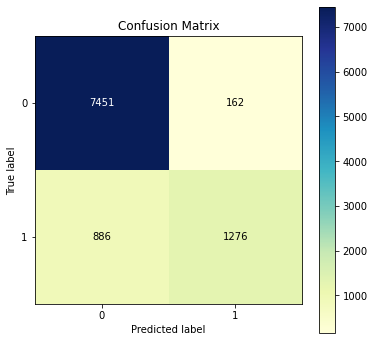

In [95]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu') #Matriz de confusion

print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn)) 

In [96]:
print(classification_report(y_pred=y_pred_knn, y_true= y_test))#obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7613
           1       0.89      0.59      0.71      2162

    accuracy                           0.89      9775
   macro avg       0.89      0.78      0.82      9775
weighted avg       0.89      0.89      0.88      9775



In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7451  162]
 [ 886 1276]]

True Positives(TP) =  7451

True Negatives(TN) =  1276

False Positives(FP) =  162

False Negatives(FN) =  886


### TERCER MÉTODO: Regresion Logistica- Accuracy 86%

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
rl = LogisticRegression(random_state=42,max_iter=500,\
                         solver='newton-cg').fit(X_train, y_train)

Accuracy: 0.8646547314578005
ROC AUC Score: 0.8718429561975456


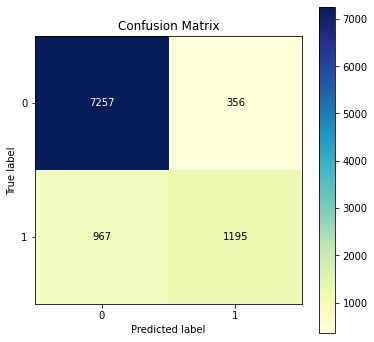

In [100]:
y_pred_rl = rl.predict(X_test)
y_pred_prob_rl = rl.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rl, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rl))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rl)) #Matriz de confusion

In [101]:
print(classification_report(y_pred=y_pred_rl, y_true= y_test))#obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7613
           1       0.77      0.55      0.64      2162

    accuracy                           0.86      9775
   macro avg       0.83      0.75      0.78      9775
weighted avg       0.86      0.86      0.86      9775



In [102]:
rl.predict_proba(X_test) #saco probabilidades de [0,1] para cada fila

array([[0.79183711, 0.20816289],
       [0.81379099, 0.18620901],
       [0.63406181, 0.36593819],
       ...,
       [0.18900154, 0.81099846],
       [0.94688889, 0.05311111],
       [0.70328863, 0.29671137]])

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rl)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7257  356]
 [ 967 1195]]

True Positives(TP) =  7257

True Negatives(TN) =  1195

False Positives(FP) =  356

False Negatives(FN) =  967


In [104]:
rl.predict_proba(X_test)[:,1] #array con probabilidad de incumplimiento de cada uno de los integrantes del dataset

array([0.20816289, 0.18620901, 0.36593819, ..., 0.81099846, 0.05311111,
       0.29671137])

## CUARTO MÉTODO: Decision Tree- Accuracy 88%

Accuracy: 0.880306905370844
ROC AUC Score: 0.8426069118588596


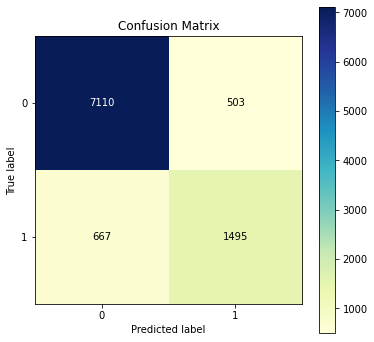

In [105]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3) # creamos el modelo dtc con el algoritmo de DecisionTreeClassifier
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_dtc, figsize=(6,6), cmap= 'YlGnBu');#Matriz de confusion
print('Accuracy:', accuracy_score(y_test, y_pred_dtc))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_dtc)) #Matriz de confusion

In [106]:
from sklearn import metrics 
print(metrics.classification_report(y_test, y_pred_dtc)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7613
           1       0.75      0.69      0.72      2162

    accuracy                           0.88      9775
   macro avg       0.83      0.81      0.82      9775
weighted avg       0.88      0.88      0.88      9775



In [107]:
feature_names = X_test.columns # obtenemos el nombre de las variables que estan en el dataset de training
feature_names

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N'],
      dtype='object')

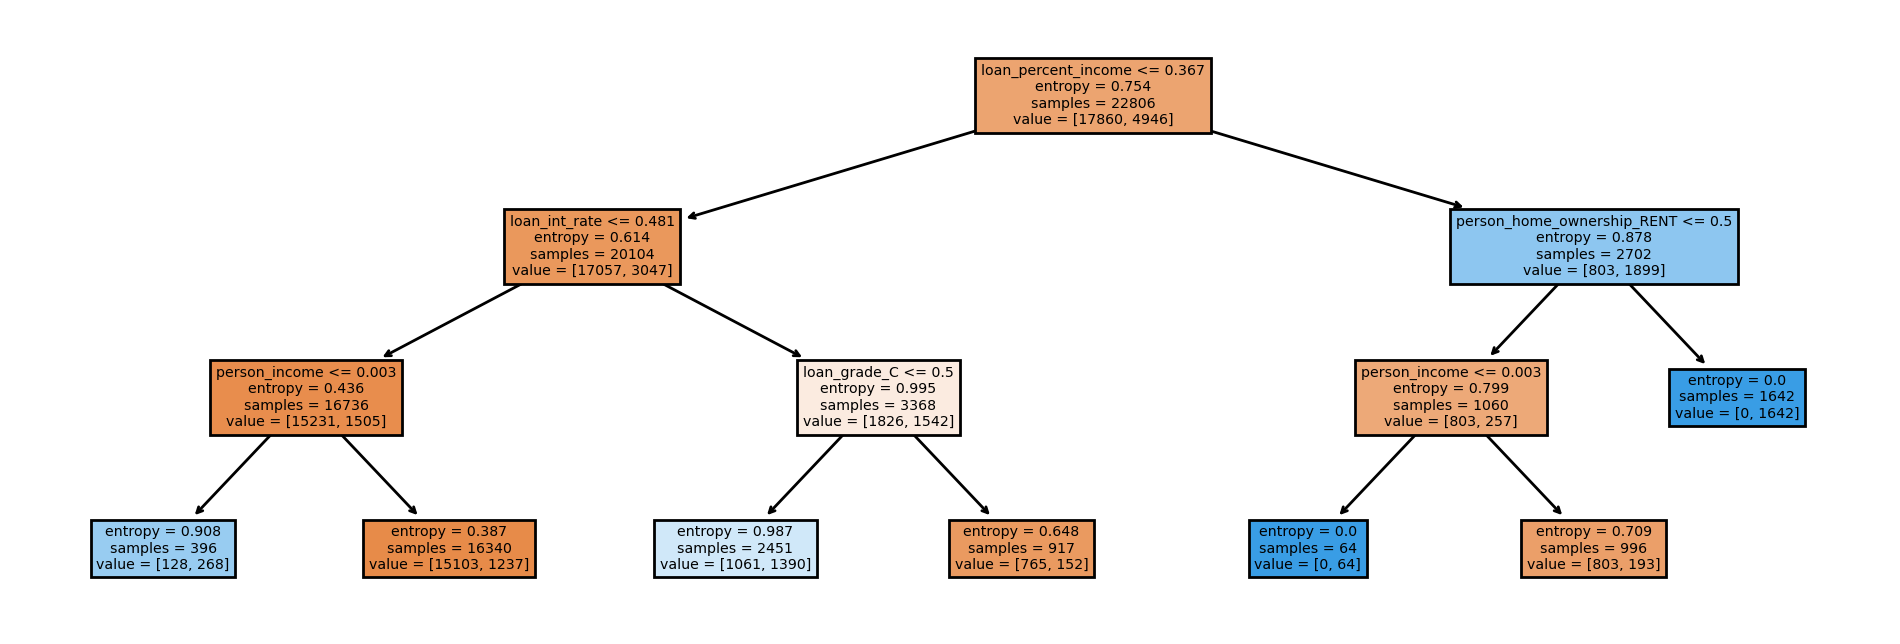

In [108]:
plt.figure(figsize=(12, 4), dpi=200)
plot_tree(dtc, feature_names=feature_names, filled=True) #graficamos el arbol del modelo dtc con los feature names obtenidos
plt.show()

## QUINTO MÉTODO: CatBoost- Accuracy 94%

In [109]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.0 MB/s eta 0:00:00


Accuracy: 0.9355498721227622
ROC AUC Score: 0.9457556108380268


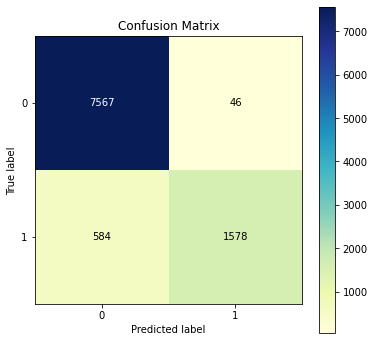

In [110]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose= 0)
cb.fit(X_train,y_train)
y_pred_cb = cb.predict(X_test)
y_pred_prob_cb = cb.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_cb, figsize=(6,6), cmap= 'YlGnBu'); #Matriz de Confusion
print('Accuracy:', accuracy_score(y_test, y_pred_cb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_cb))

In [111]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_cb)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7613
           1       0.97      0.73      0.83      2162

    accuracy                           0.94      9775
   macro avg       0.95      0.86      0.90      9775
weighted avg       0.94      0.94      0.93      9775



## SEXTO MÉTODO: XGBoost- Accuracy 92%

Accuracy: 0.9228644501278772
ROC AUC Score: 0.9282256493682054


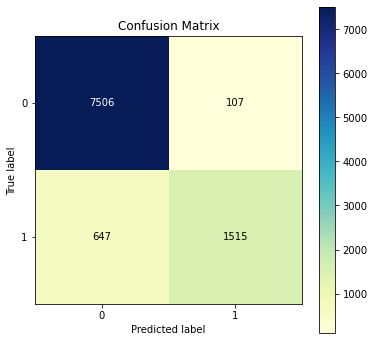

In [112]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb, figsize=(6,6), cmap= 'YlGnBu'); #Matriz de Confusion
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

In [113]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_xgb)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7613
           1       0.93      0.70      0.80      2162

    accuracy                           0.92      9775
   macro avg       0.93      0.84      0.88      9775
weighted avg       0.92      0.92      0.92      9775



## Conclusiones

Se puede observar del uso de los distintos modelos que, si bien todos los utilizados muestran un muy buen accuracy, es el CatBoost el que mejor desempeño exhibe, con un valor del 94% -siendo este también el modelo con mejor AUC-, secundado por el Random Forest tras corregir los hiperparámetros, con un 93% y el XGBoost con 92%. 

In [114]:
Performance = pd.DataFrame(
    data = {
        'Model': ['RF', 'RF2', 'KNN', 'RL', 'DTC', 'CB', 'XGB'], 
        'Score': [accuracy_score(y_test, y_pred_rf),
                  accuracy_score(y_test, y_pred_rf2),
                  accuracy_score(y_test, y_pred_knn),
                  accuracy_score(y_test, y_pred_rl),
                  accuracy_score(y_test, y_pred_dtc),
                  accuracy_score(y_test, y_pred_cb), 
                  accuracy_score(y_test, y_pred_xgb)]
    }
)

In [115]:
PerformanceOrdenada = Performance.sort_values('Score', ascending=False)
PerformanceOrdenada

,Model,Score
5,CB,0.935550
1,RF2,0.932583
6,XGB,0.922864
0,RF,0.910077
2,KNN,0.892788
4,DTC,0.880307
3,RL,0.864655


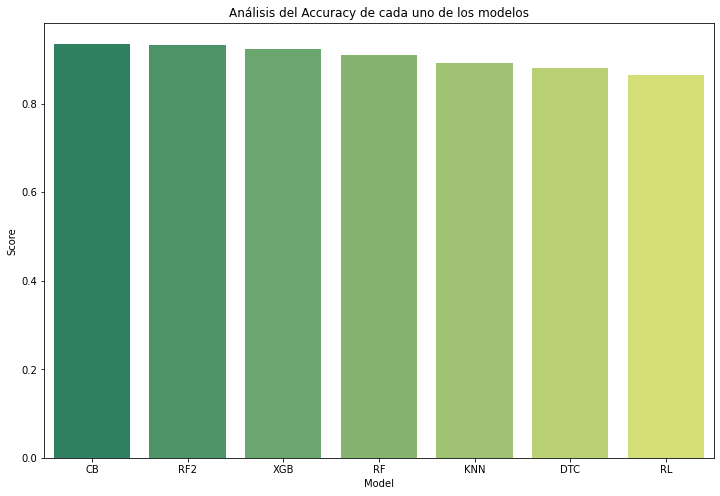

In [116]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data= PerformanceOrdenada, palette="summer")
plt.title('Análisis del Accuracy de cada uno de los modelos')
plt.show()

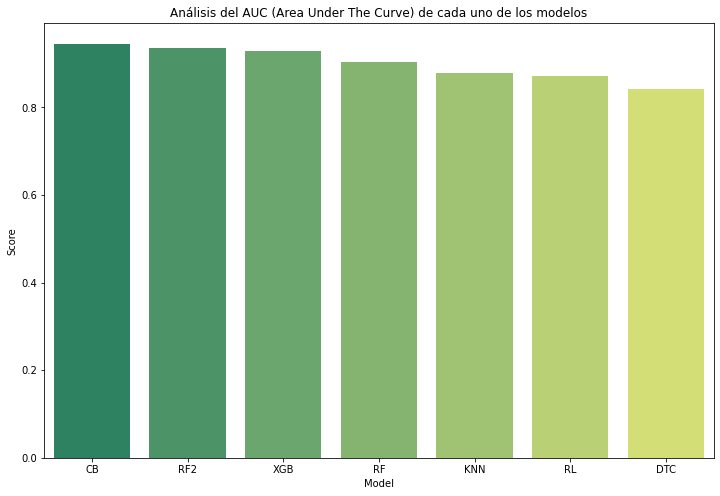

In [117]:
Performance = pd.DataFrame(
    data = {
        'Model': ['RF', 'RF2', 'KNN', 'RL', 'DTC', 'CB', 'XGB'], 
        'Score': [roc_auc_score(y_test, y_pred_prob_rf),
                  roc_auc_score(y_test, y_pred_prob_rf2),
                  roc_auc_score(y_test, y_pred_prob_knn),
                  roc_auc_score(y_test, y_pred_prob_rl),
                  roc_auc_score(y_test, y_pred_prob_dtc),
                  roc_auc_score(y_test, y_pred_prob_cb), 
                  roc_auc_score(y_test, y_pred_prob_xgb)]
    }
)

PerformanceOrdenada = Performance.sort_values('Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data= PerformanceOrdenada, palette="summer")
plt.title('Análisis del AUC (Area Under The Curve) de cada uno de los modelos')
plt.show()

Realizamos la misma gráfica para comparar otras métricas, tales como precisión, recall y F1 Score

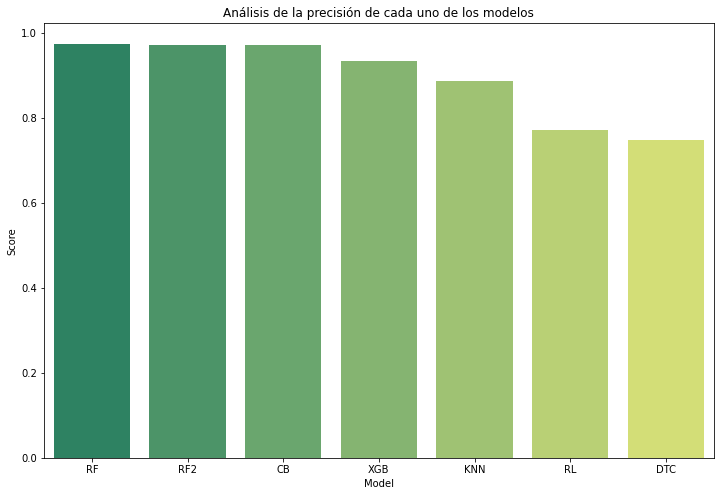

In [118]:
Performance = pd.DataFrame(
    data = {
        'Model': ['RF', 'RF2', 'KNN', 'RL', 'DTC', 'CB', 'XGB'], 
        'Score': [precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_rf2),
                  precision_score(y_test, y_pred_knn),
                  precision_score(y_test, y_pred_rl),
                  precision_score(y_test, y_pred_dtc),
                  precision_score(y_test, y_pred_cb), 
                  precision_score(y_test, y_pred_xgb)]
    }
)

PerformanceOrdenada = Performance.sort_values('Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data= PerformanceOrdenada, palette="summer")
plt.title('Análisis de la precisión de cada uno de los modelos')
plt.show()

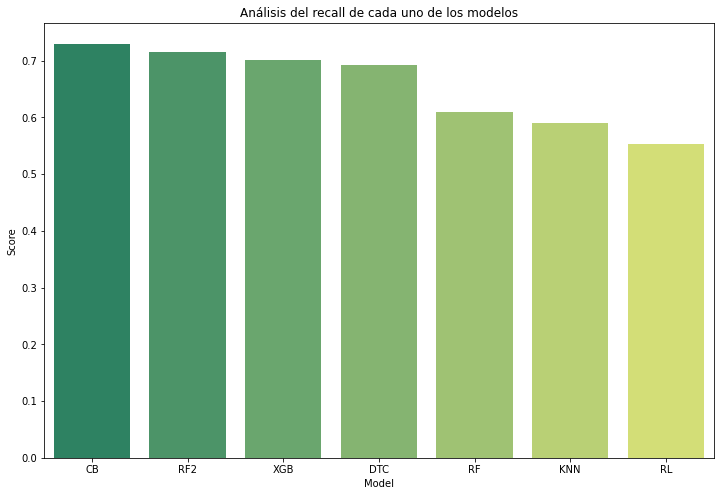

In [119]:
Performance = pd.DataFrame(
    data = {
        'Model': ['RF', 'RF2', 'KNN', 'RL', 'DTC', 'CB', 'XGB'], 
        'Score': [recall_score(y_test, y_pred_rf),
                  recall_score(y_test, y_pred_rf2),
                  recall_score(y_test, y_pred_knn),
                  recall_score(y_test, y_pred_rl),
                  recall_score(y_test, y_pred_dtc),
                  recall_score(y_test, y_pred_cb), 
                  recall_score(y_test, y_pred_xgb)]
    }
)

PerformanceOrdenada = Performance.sort_values('Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data= PerformanceOrdenada, palette="summer")
plt.title('Análisis del recall de cada uno de los modelos')
plt.show()

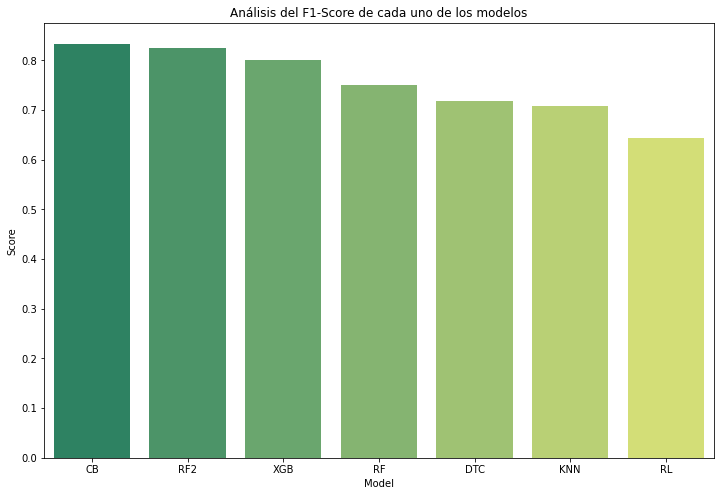

In [120]:
Performance = pd.DataFrame(
    data = {
        'Model': ['RF', 'RF2', 'KNN', 'RL', 'DTC', 'CB', 'XGB'], 
        'Score': [f1_score(y_test, y_pred_rf),
                  f1_score(y_test, y_pred_rf2),
                  f1_score(y_test, y_pred_knn),
                  f1_score(y_test, y_pred_rl),
                  f1_score(y_test, y_pred_dtc),
                  f1_score(y_test, y_pred_cb), 
                  f1_score(y_test, y_pred_xgb)]
    }
)

PerformanceOrdenada = Performance.sort_values('Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data= PerformanceOrdenada, palette="summer")
plt.title('Análisis del F1-Score de cada uno de los modelos')
plt.show()

In [121]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 8.8 MB/s eta 0:00:00


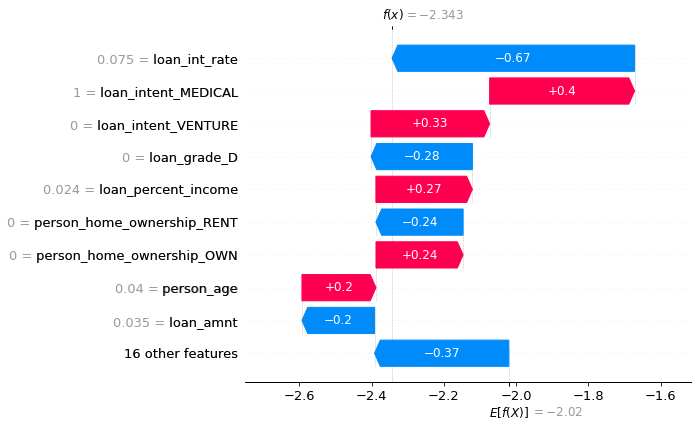

In [122]:
import shap
explainer = shap.Explainer(cb)
shap_values = explainer(X_train)
# visualizar la explicación de clientes que NO cayeron en mora (loan_status= 0)
shap.plots.waterfall(shap_values[0])

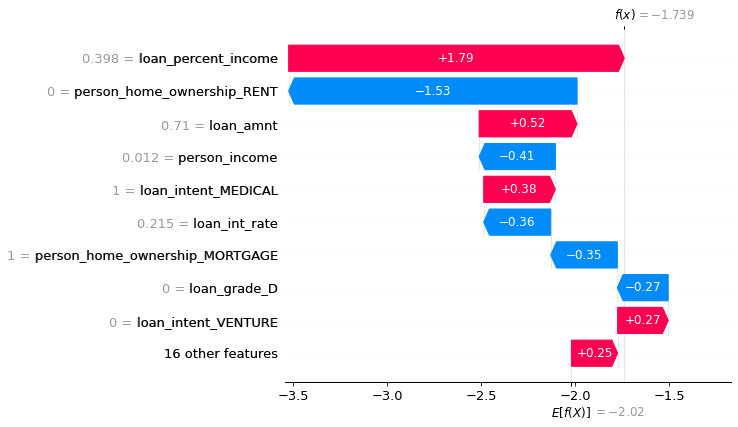

In [123]:
# visualizar la explicación de clientes que SI cayeron en mora (loan_status= 1)
shap.plots.waterfall(shap_values[1])

# PCA

In [124]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [125]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X_new)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [126]:
pca_pipe # pasos a ejecutar

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [127]:
pca_pipe.fit(X_new)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [128]:
modelo_pca.components_

array([[ 3.51154381e-02,  8.63829616e-02,  1.20605236e-01,
        -9.25017023e-02, -5.18180914e-01, -1.72385453e-01,
         2.97493411e-02,  2.63435156e-01, -1.45335116e-02,
         1.65081243e-02, -2.66653248e-01, -1.51265576e-03,
        -1.26665900e-03,  3.57870277e-03, -2.33710846e-02,
         1.09948022e-02,  1.29123539e-02,  4.50197336e-01,
         3.31659316e-02, -2.76598790e-01, -2.62749941e-01,
        -1.48933715e-01, -8.12374382e-02, -4.96349402e-02,
         3.82997040e-01],
       [ 4.26651182e-01,  3.17171029e-01,  2.88216768e-01,
         2.44621776e-01,  1.74161331e-01, -3.08686056e-02,
         4.11217906e-01,  3.72276442e-01,  6.70772460e-03,
         5.46982153e-04, -3.67629139e-01, -5.37496290e-03,
        -9.69605899e-02,  1.31162996e-01, -4.08677491e-02,
         4.33902075e-02, -2.35882641e-03, -1.11466184e-01,
        -6.95960510e-02,  7.79251081e-02,  1.08923430e-01,
         7.45279911e-02,  5.62503473e-02,  4.87880515e-02,
        -1.54256210e-01],
    

In [129]:
# Convertimos el array de aqui arriba a un dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X_new.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16','PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25']
)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N
PC1,3.511544e-02,8.638296e-02,1.206052e-01,-9.250170e-02,-5.181809e-01,-1.723855e-01,2.974934e-02,0.263435,-0.014534,0.016508,...,0.010995,0.012912,0.450197,0.033166,-0.276599,-0.262750,-0.148934,-0.081237,-0.049635,3.829970e-01
PC2,4.266512e-01,3.171710e-01,2.882168e-01,2.446218e-01,1.741613e-01,-3.086861e-02,4.112179e-01,0.372276,0.006708,0.000547,...,0.043390,-0.002359,-0.111466,-0.069596,0.077925,0.108923,0.074528,0.056250,0.048788,-1.542562e-01
PC3,5.085731e-01,-5.425941e-02,-3.600165e-02,-1.393230e-01,-9.567085e-02,-2.199608e-02,5.130165e-01,-0.402791,-0.024581,-0.022598,...,0.049364,-0.025493,0.001507,0.165614,-0.090325,-0.083992,-0.063494,-0.038865,-0.033903,1.578587e-01
PC4,-6.714253e-02,1.722347e-02,3.759103e-02,4.763818e-01,3.035996e-02,4.496451e-01,-6.724835e-02,0.009928,0.020357,0.019267,...,0.001810,0.022955,-0.228657,0.533318,-0.348364,-0.053051,0.048636,0.047915,0.041950,2.991795e-01
PC5,-5.969142e-02,1.377145e-01,-9.422612e-04,-3.709853e-01,1.562750e-01,-5.070211e-01,-6.652793e-02,0.148849,-0.017724,-0.129042,...,0.023145,-0.056556,-0.434421,0.528140,0.041659,-0.122505,-0.082285,-0.049551,-0.045655,8.689016e-02
PC6,-1.346519e-02,8.592548e-02,-2.943485e-02,1.141470e-01,-2.633612e-02,3.099652e-02,-2.299234e-02,0.138472,-0.028871,-0.594845,...,-0.012665,-0.532749,0.073751,-0.072760,-0.049382,0.034061,0.027956,0.040232,0.001200,1.007163e-02
PC7,1.019041e-01,5.213733e-02,-3.612317e-02,6.852851e-02,-3.282544e-02,4.816139e-02,1.082691e-01,-0.045080,-0.043054,0.025483,...,-0.031206,-0.308157,-0.007931,0.004865,0.138048,-0.162168,-0.006024,-0.005111,-0.025141,1.528550e-02
PC8,-8.317417e-03,-2.007925e-02,5.530936e-02,2.702583e-02,-3.904388e-03,2.772458e-02,-1.207303e-02,0.068438,-0.031827,0.012926,...,-0.486904,-0.171659,-0.021707,0.009627,0.113260,-0.134281,-0.012573,0.049825,0.014892,-6.432936e-03
PC9,5.665934e-02,6.774943e-02,-6.475741e-03,5.010966e-02,-3.022618e-02,1.545297e-02,5.528978e-02,-0.031313,0.004002,-0.052700,...,-0.673937,0.442981,-0.019656,0.021125,0.166575,-0.235078,0.025761,0.025076,0.008990,7.637906e-03
PC10,6.568292e-03,1.031808e-02,-2.199014e-02,-1.465403e-01,9.096095e-02,-1.822241e-01,8.455980e-04,-0.045559,0.053876,0.025956,...,-0.348873,-0.024764,0.065213,-0.028414,-0.545344,0.564718,0.117574,0.036631,-0.015283,3.433569e-02


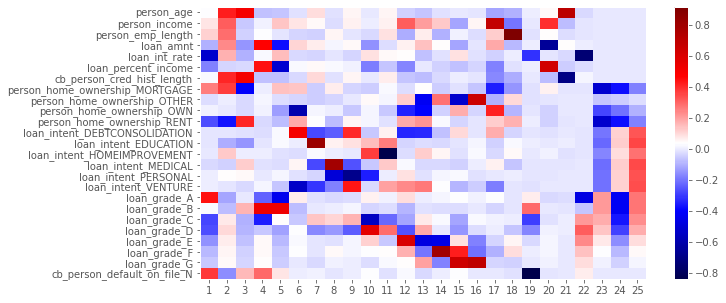

In [130]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(X_new.columns)), X_new.columns)
plt.xticks(range(len(X_new.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [131]:
modelo_pca.explained_variance_ratio_

array([1.11008606e-01, 8.84911438e-02, 7.20150634e-02, 6.71923737e-02,
       5.71803640e-02, 5.35354684e-02, 4.90300901e-02, 4.86257792e-02,
       4.81319384e-02, 4.68236961e-02, 4.42276433e-02, 4.30077551e-02,
       4.08720260e-02, 4.04886195e-02, 4.02312576e-02, 3.97912926e-02,
       3.76269800e-02, 3.38726437e-02, 1.88220823e-02, 9.36468614e-03,
       5.53232390e-03, 4.12816700e-03, 6.24693296e-33, 3.18005665e-33,
       1.34778494e-33])

In [132]:
z=y

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.11008606e-01 8.84911438e-02 7.20150634e-02 6.71923737e-02
 5.71803640e-02 5.35354684e-02 4.90300901e-02 4.86257792e-02
 4.81319384e-02 4.68236961e-02 4.42276433e-02 4.30077551e-02
 4.08720260e-02 4.04886195e-02 4.02312576e-02 3.97912926e-02
 3.76269800e-02 3.38726437e-02 1.88220823e-02 9.36468614e-03
 5.53232390e-03 4.12816700e-03 6.24693296e-33 3.18005665e-33
 1.34778494e-33]


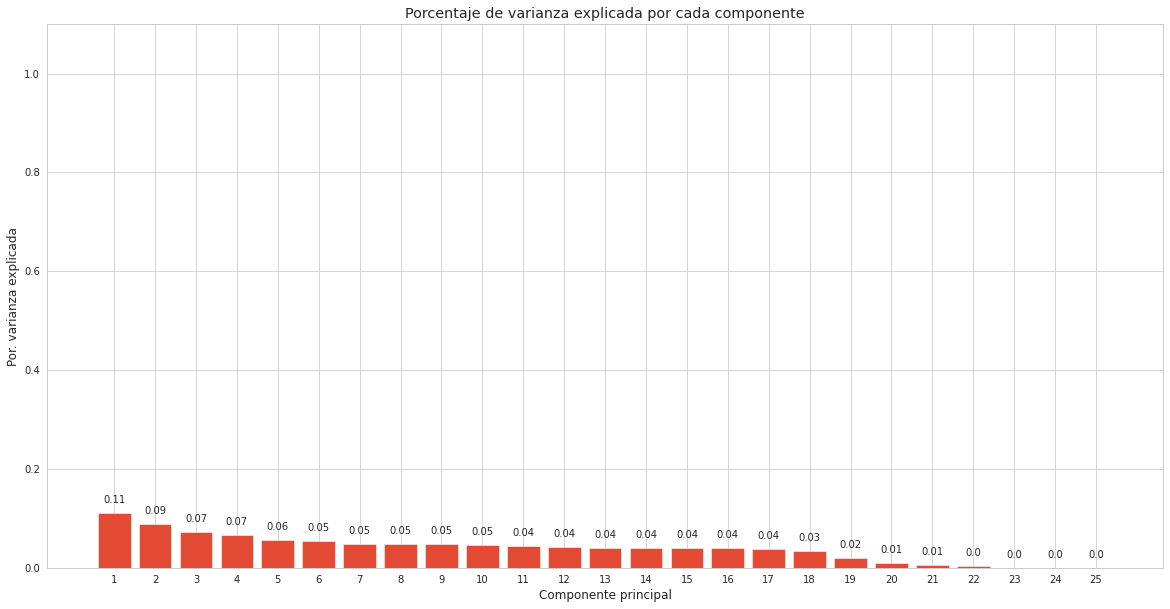

In [133]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
# texto
for x, y in zip(np.arange(len(X_new.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [134]:
#Varianza acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.11100861, 0.19949975, 0.27151481, 0.33870719, 0.39588755,
       0.44942302, 0.49845311, 0.54707889, 0.59521083, 0.64203452,
       0.68626217, 0.72926992, 0.77014195, 0.81063057, 0.85086182,
       0.89065312, 0.9282801 , 0.96215274, 0.98097482, 0.99033951,
       0.99587183, 1.        , 1.        , 1.        , 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.11100861 0.19949975 0.27151481 0.33870719 0.39588755 0.44942302
 0.49845311 0.54707889 0.59521083 0.64203452 0.68626217 0.72926992
 0.77014195 0.81063057 0.85086182 0.89065312 0.9282801  0.96215274
 0.98097482 0.99033951 0.99587183 1.         1.         1.
 1.        ]


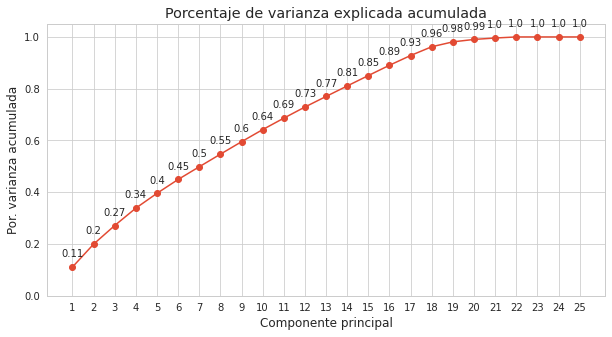

In [135]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(
    np.arange(len(X_new.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_new.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.05)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Tal puede observarse en el cuadro inmediatamente superior, no existen componentes con gran poder explicativo, en ningun caso superando el mismo el 11% de la varianza total. De hecho, para alcanzar el 62% del primer componente visto en el ejemplo de la clase, en esta oportunidad necesitariamos llegar al decimo elemento.

In [136]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit_transform(X_new)

print(pd.DataFrame(pca.components_,columns=X_new.columns,index = ['PC-1','PC-2','PC-3']))

      person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
PC-1    0.002159       0.002793           0.010940   0.023335      -0.091374   
PC-2    0.001605       0.001362           0.002993   0.052245       0.134232   
PC-3    0.001841       0.000843           0.001249   0.023951       0.179967   

      loan_percent_income  cb_person_cred_hist_length  \
PC-1            -0.029228                    0.004723   
PC-2             0.010836                    0.004530   
PC-3             0.002519                    0.004956   

      person_home_ownership_MORTGAGE  person_home_ownership_OTHER  \
PC-1                        0.647631                     0.000187   
PC-2                        0.211003                     0.000932   
PC-3                        0.147407                     0.001038   

      person_home_ownership_OWN  ...  loan_intent_PERSONAL  \
PC-1                   0.015719  ...              0.010378   
PC-2                  -0.001826  ...             

Se puede observar nuevamente en la celda previa que, para la mayor parte de las variables del dataset, los CP no exhiben un gran poder explicativo, con la sola excepción quizas de person_home_ownership_MORTGAGE (deuda con hipoteca). Por ello, sumado al alto grado de abstracción que implica trabajar con los CP, mantenemos el dataset utilizado para el pròximo paso, en el que realizaremos cross validation.

# Cross Validation

In [137]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as sm

In [138]:
rf = RandomForestClassifier(max_depth=20, random_state=42, n_estimators=100,criterion="gini")  #utilizamos los hiperparametros ya calculados en el apartado previo
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]


Accuracy: 0.9325831202046035
ROC AUC Score: 0.9352706912429966


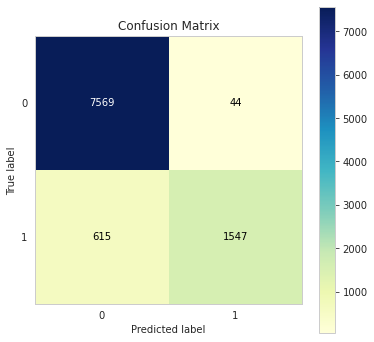

In [139]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred_rf, y_true= y_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7613
           1       0.97      0.72      0.82      2162

    accuracy                           0.93      9775
   macro avg       0.95      0.85      0.89      9775
weighted avg       0.94      0.93      0.93      9775



### STRATIFIED K FOLD

In [141]:
y=z

In [142]:
X=X_new

In [143]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## Random Forest

Avanzamos con la validacion cruzada en el random forest con 5, 7 y 10 folds

In [144]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= 5, scoring="accuracy")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.93187049 0.91635973 0.9378453  0.922345   0.93431553]
Average score: 0.93


In [145]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= 7, scoring="accuracy")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.92373792 0.9056928  0.9254565  0.93768801 0.93124194 0.92565535
 0.93768801]
Average score: 0.93


In [146]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= 10, scoring="accuracy")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.91807303 0.92050338 0.90392879 0.92173112 0.9349294  0.94505832
 0.92449355 0.91589932 0.93400859 0.93523634]
Average score: 0.93


Se observa que no hay diferencia en el Accuracy promedio obtenido en los tres ejemplos. Para simplificar el analisis continuaremos viendo las matricas del de menor cantidad de folds (5)  

In [147]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= 5, scoring="precision")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.86711712 0.98028478 0.94255875 0.98107256 0.96883853]
Average score: 0.95


In [148]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= 5, scoring="f1")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.83877996 0.76659529 0.84247375 0.78667791 0.82741935]
Average score: 0.81


In [150]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= 5, scoring="recall")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.81223629 0.62939522 0.76160338 0.65657987 0.72202674]
Average score: 0.72


In [151]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= 5, scoring="roc_auc")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.93370151 0.87127302 0.91541647 0.90158902 0.91913047]
Average score: 0.91


Se desprende que el uso del modelo de Stratified K-Fold para realizar Cross Validation del Random Forest no ofrece grandes mejoras respecto a los resultados originales. No obstante ello, es probable que el resultado del Cross Validation brinde una respuesta más estable sobre cómo se desempeña su modelo en diversos conjuntos de datos.

## CatBoost

Aplicamos tambien el Cross Validation en el mopdelo que mejor respuesta habia brindado en materia de Accuracy, el CatBoost.

In [152]:
score = cross_val_score(CatBoostClassifier(verbose= 0), X, y, cv= 5, scoring="accuracy")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.92557925 0.91129527 0.93462247 0.9198895  0.93477594]
Average score: 0.93


In [153]:
score = cross_val_score(CatBoostClassifier(verbose= 0), X, y, cv= 5, scoring="precision")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.83203402 0.92115768 0.9241908  0.96677051 0.97609943]
Average score: 0.92


In [154]:
score = cross_val_score(CatBoostClassifier(verbose= 0), X, y, cv= 5, scoring="roc_auc")
print(f'Scores para cada fold son: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores para cada fold son: [0.94009267 0.88305414 0.92383127 0.91517549 0.93810617]
Average score: 0.92


Al igual que lo mencionado en el caso del Random Forest, en el Catboost tampoco observamos mejoras en el desempeño, si se mide el mismo a traves del accuracy, precision o AUC, entendiendo que la principal ventaja de aplicar este proceso radicaria en la mayor estabilidad de la respuesta del modelo.